# Summer Academy NPS Data

### Import and set up data/display:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

FILEPATH = "../datasets/2017/feedback.csv"

df = pd.read_csv(FILEPATH, index_col=0)

sns.set(style="white", context="notebook", palette="deep")
COLOR_COLUMNS = ["#66C2FF", "#5CD6D6", "#00CC99", "#85E085", "#FFD966", "#FFB366", "#FFB3B3", "#DAB3FF", "#C2C2D6"]
sns.set_palette(palette=COLOR_COLUMNS, n_colors=4)

# How many more promoters are there than detractors across our 2017 data?

Create new df without unrated feedback. Turn Rating (Num) from string into int.

In [2]:
df_rated = df.copy()
df_rated = df_rated.loc[df['Rating (Num)'] != '#ERROR!']
df_rated['Rating (Num)'] = df_rated['Rating (Num)'].apply(lambda x: int(x))

Split into NPS categories (Promoter, Passive, Detractor)

In [3]:
BINS = [0, 6, 8, 10]
LABELS = ["Detractor", "Passive", "Promoter"]

df_rated["nps_categories"] = pd.cut(df_rated['Rating (Num)'], BINS, include_lowest=True, labels=LABELS)
df_rated

Location           Track    Week  Rating (Num)    Schedule Pacing  \
ID                                                                             
134   San Francisco  Apps, Explorer  Week 1             3         Just right   
36      Los Angeles            Apps  Week 1             4  A little too fast   
117   San Francisco           Games  Week 1             4       Way too slow   
253             NaN             NaN  Week 2             4  A little too fast   
350   New York City  Apps, Explorer  Week 1             4         Just right   
...             ...             ...     ...           ...                ...   
1495  New York City  Apps, Explorer  Week 7            10         Just right   
1496  New York City  Apps, Explorer  Week 7             8         Just right   
1497  New York City            Apps  Week 7            10         Just right   
1498  New York City  Apps, Explorer  Week 7             1  A little too slow   
1499  New York City            Apps  Week 5             8         Just right   

     nps_categories  
ID                   
134       Detractor  
36        Detractor  
117       Detractor  
253       Detractor  
350       Detractor  
...             ...  
1495       Promoter  
1496        Passive  
1497       Promoter  
1498      Detractor  
1499        Passive  

[1450 rows x 6 columns]

Visualize with pie chart

(-1.1097917354195055,
 1.1004662731152146,
 -1.1224835377140603,
 1.1089888454347638)

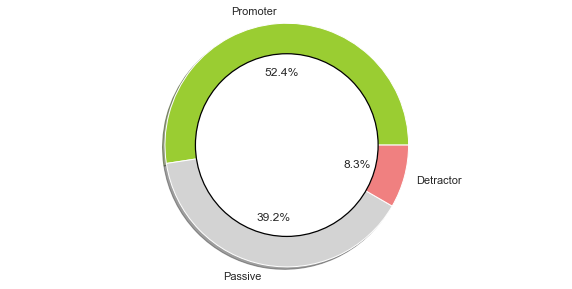

In [4]:
colors = ['yellowgreen', 'lightgray', 'lightcoral']
fig, axs = plt.subplots(figsize=(10,5))
nps_df = df_rated["nps_categories"].value_counts()
plt.pie(nps_df.values, labels=["Promoter", "Passive", "Detractor"], colors=colors, autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.75, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

In [5]:
df_rated["nps_categories"].value_counts()

Promoter     760
Passive      569
Detractor    121
Name: nps_categories, dtype: int64

### How many more promoters than detractors? Promoters - Detractors

In [6]:
760-121

639

### 639 more promoters than detractors. 

# Which track boasts the best promoter-to-detractor ratio?

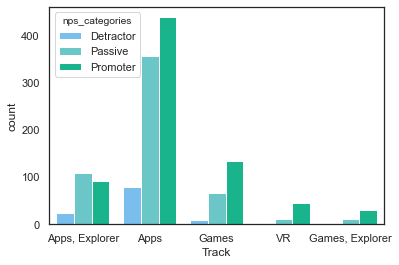

In [7]:
plt.show(sns.countplot("Track", hue="nps_categories", data=df_rated))

In [8]:
df_rated["Track"].value_counts()

Apps               871
Apps, Explorer     224
Games              208
VR                  60
Games, Explorer     43
Name: Track, dtype: int64

Text(0.5, 1.0, 'Games, Explorer\n')

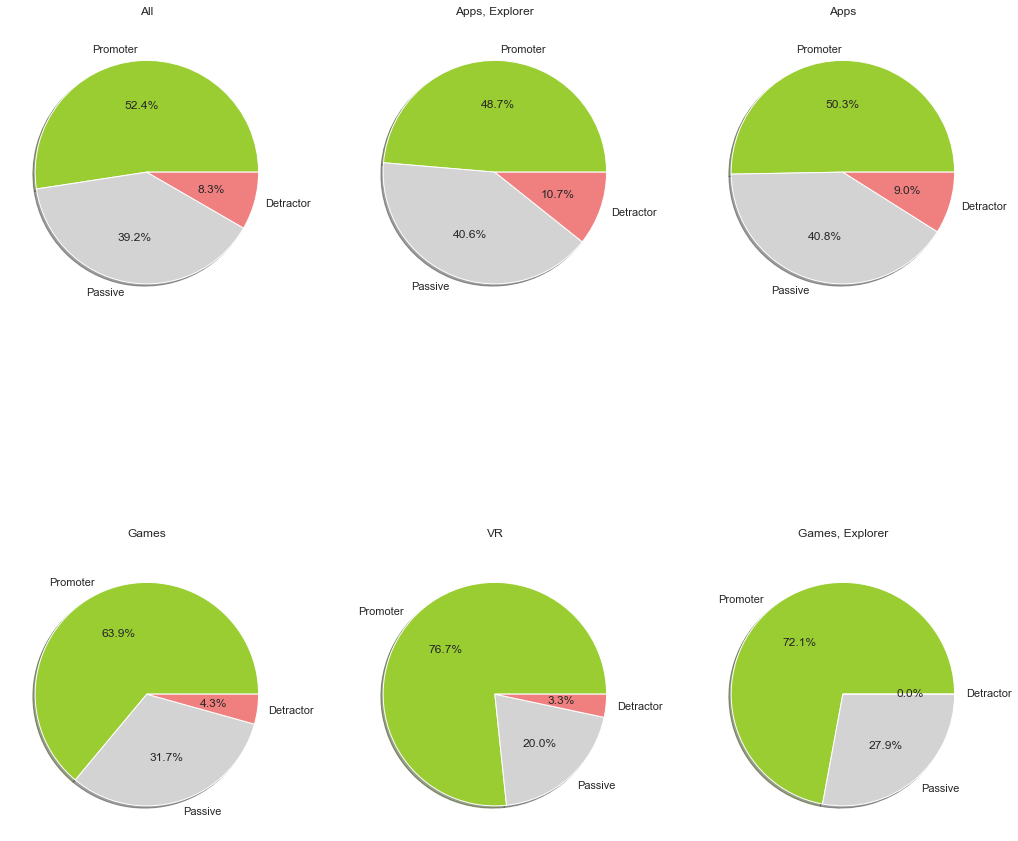

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(15,15))
fig.tight_layout(pad=3.0)

nps_df = df_rated["nps_categories"].value_counts()
axs[0,0].pie(nps_df.values, labels=["Promoter", "Passive", "Detractor"], colors=colors, autopct='%1.1f%%', shadow=True)
axs[0,0].set_title("All\n")
centre_circle = plt.Circle((0,0),0.75, color='black', fc='white', linewidth=1.25)

df_apps_exp_rated = df_rated.loc[df['Track'] == 'Apps, Explorer']
nps_df = df_apps_exp_rated["nps_categories"].value_counts()
axs[0,1].pie(nps_df.values, labels=["Promoter", "Passive", "Detractor"], colors=colors, autopct='%1.1f%%', shadow=True)
axs[0,1].set_title("Apps, Explorer\n")

df_apps_exp_rated = df_rated.loc[df['Track'] == 'Apps']
nps_df = df_apps_exp_rated["nps_categories"].value_counts()
axs[0,2].pie(nps_df.values, labels=["Promoter", "Passive", "Detractor"], colors=colors, autopct='%1.1f%%', shadow=True)
axs[0,2].set_title("Apps\n")

df_apps_exp_rated = df_rated.loc[df['Track'] == 'Games']
nps_df = df_apps_exp_rated["nps_categories"].value_counts()
axs[1,0].pie(nps_df.values, labels=["Promoter", "Passive", "Detractor"], colors=colors, autopct='%1.1f%%', shadow=True)
axs[1,0].set_title("Games\n")

df_apps_exp_rated = df_rated.loc[df['Track'] == 'VR']
nps_df = df_apps_exp_rated["nps_categories"].value_counts()
axs[1,1].pie(nps_df.values, labels=["Promoter", "Passive", "Detractor"], colors=colors, autopct='%1.1f%%', shadow=True)
axs[1,1].set_title("VR\n")

df_apps_exp_rated = df_rated.loc[df['Track'] == 'Games, Explorer']
nps_df = df_apps_exp_rated["nps_categories"].value_counts()
axs[1,2].pie(nps_df.values, labels=["Promoter", "Passive", "Detractor"], colors=colors, autopct='%1.1f%%', shadow=True)
axs[1,2].set_title("Games, Explorer\n")

## The track with the highest promotor-to-detractor ratio was VR, with 76.7% promoters and only 3.3% detractors (net 73.4% promotors). 
### Games, Explorer was a close second with 72.1% promoters and no detractors. 
It's worth noting that VR and Games, Explorer have the least robust data, as they were the least populated tracks by a significant margin (60 and 43 students respectively, compared with the next-least populated track, Games, which received 208 reviews). 